In [1]:
import os
import sys

import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# ====================
# load mla python library
# ====================
repo_dir = os.path.dirname(os.getcwd())

src_dir = os.path.join(
    repo_dir,
    'src'
)

if src_dir not in sys.path:
    sys.path.append(src_dir)

from mla_reconstruction import _load_mla_data_into_hdf5_dev

In [3]:
# ======================
# load data
# ======================
exmpl_dir = 'examples'
data_dir = 'test_data'
data_subdir = '2021-03-19_grid-MLA-zsweep_5x5nm_5x5pxl_test'

mla_txt_fn = os.path.join(
    repo_dir,
    exmpl_dir,
    data_dir,
    data_subdir,
    'Measurement of 2021-03-20 0655.txt'
)

mla_fn = mla_txt_fn.replace('.txt', '.hdf5')

In [4]:
# ======================
# convert data from txt to hdf5
#      already completed
# ======================
mla_fn = _load_mla_data_into_hdf5_dev(
    mla_txt_fn,
    resize_curr=(5,5,40,119),
    resize_cond=(5,5,40,119),
    mode='w'
)

Processed 0/1000
Processed 10/1000
Processed 20/1000
Processed 30/1000
Processed 40/1000
Processed 50/1000
Processed 60/1000
Processed 70/1000
Processed 80/1000
Processed 90/1000
Processed 100/1000
Processed 110/1000
Processed 120/1000
Processed 130/1000
Processed 140/1000
Processed 150/1000
Processed 160/1000
Processed 170/1000
Processed 180/1000
Processed 190/1000
Processed 200/1000
Processed 210/1000
Processed 220/1000
Processed 230/1000
Processed 240/1000
Processed 250/1000
Processed 260/1000
Processed 270/1000
Processed 280/1000
Processed 290/1000
Processed 300/1000
Processed 310/1000
Processed 320/1000
Processed 330/1000
Processed 340/1000
Processed 350/1000
Processed 360/1000
Processed 370/1000
Processed 380/1000
Processed 390/1000
Processed 400/1000
Processed 410/1000
Processed 420/1000
Processed 430/1000
Processed 440/1000
Processed 450/1000
Processed 460/1000
Processed 470/1000
Processed 480/1000
Processed 490/1000
Processed 500/1000
Processed 510/1000
Processed 520/1000
Proc

In [5]:
mla = h5py.File(mla_fn, 'r')

dset = mla['dset']
curr = mla['curr']
cond = mla['cond']
lin_en = mla['lin_en']

prm = dict(dset.attrs.items())


In [12]:
cond.shape

(5, 5, 40, 119)

In [10]:
dset.shape

(1000, 31)

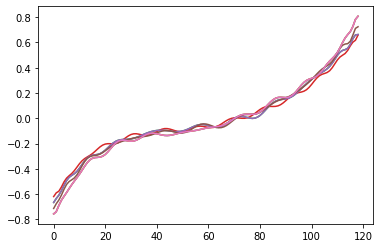

In [18]:
plt.plot(curr[-1,-1,-1,:])
plt.plot(curr[-1,-5,-1,:])
plt.plot(curr[-3,-1,-1,:])
plt.plot(curr[-4,-3,-1,:])
plt.plot(curr[-3,-2,-1,:])
plt.plot(curr[-2,-2,-1,:])
plt.plot(curr[-1,-3,-1,:])



In [6]:
n_zsweep = 40

In [7]:
# =============
# setup colormap
# =============
cm = matplotlib.cm.viridis
cm_lst = [cm.colors[int(i/n_zsweep * 256)] for i in range(n_zsweep)]


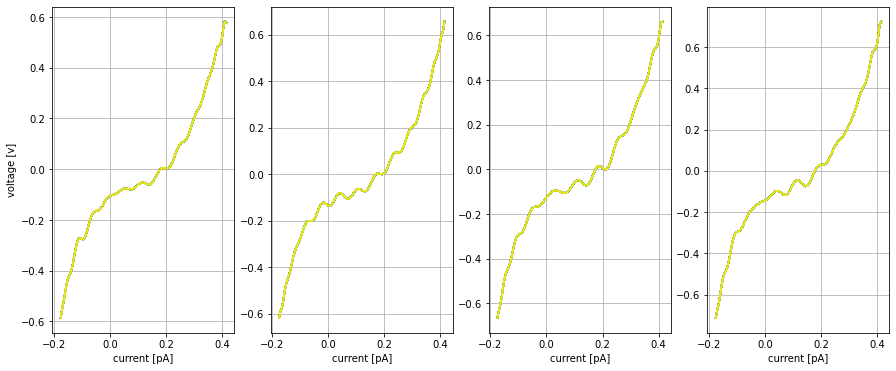

In [8]:
fig = plt.figure(figsize=(15,6))

ax_sttngs = {
    'xlabel':   'current [pA]'
}

# ====================
# plot 1
# ====================
ax1 = fig.add_subplot(141, **ax_sttngs)

n_point1 = 0
for idz in range(n_zsweep):
    ax1.plot(
        np.array(lin_en),
        np.array(curr[0,0,idz,:]),
        c=cm_lst[idz]
    )
ax1.grid()
ax1.set_ylabel('voltage [v]')

# ====================
# plot 2
# ====================
ax2 = fig.add_subplot(142, **ax_sttngs)

n_point1 = 1000
for idz in range(n_zsweep):
    ax2.plot(
        np.array(lin_en),
        np.array(curr[1,1,idz,:]),
        c=cm_lst[idz]
    )
ax2.grid()

    
# ====================
# plot 3
# ====================
ax3 = fig.add_subplot(143, **ax_sttngs)

n_point1 = 2000
for idz in range(n_zsweep):
    ax3.plot(
        np.array(lin_en),
        np.array(curr[2,4,idz,:]),
        c=cm_lst[idz]
    )
ax3.grid()

    
# ====================
# plot 4
# ====================
ax4 = fig.add_subplot(144, **ax_sttngs)

n_point1 = 3000
for idz in range(n_zsweep):
    ax4.plot(
        np.array(lin_en),
        np.array(curr[3,1,idz,:]),
        c=cm_lst[idz]
    )
ax4.grid()


